In [1]:
from numpy import *
import numpy as np
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# This two functions are from my homemade library, i put them in the next cell.
# from lwsspy.plot import plot_label
# from lwsspy.GF.lagrange import gll_nodes


In [2]:
from typing import Union
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.axes import Axes
import numpy as np


def gll_nodes(npol):

    # Get machine epsilon
    eps = np.finfo(np.float64).eps

    # Number of nodes
    ngll = npol + 1

    # Chebychev-Gauss-Lobatto nodes as first guess
    x = -np.cos(np.pi*np.arange(0, npol+1)/npol)

    # Vandermonde matrix
    P = np.zeros((ngll, ngll))

    # Use recursion
    xold = 2. * np.ones(ngll)

    while np.max(np.abs(x-xold)) > eps:
        xold[:] = x[:]
        P[:, 0] = np.ones(ngll)
        P[:, 1] = x[:]
        for k in range(1, npol):
            P[:, k+1] = ((2*(k+1)-1) * x[:] * P[:, k]-(k)*P[:, k-1]) / (k+1)

        x[:] = xold[:] - (x[:] * P[:, ngll-1] - P[:, npol-1]) / \
            (ngll * P[:, ngll-1])

    w = 2. / (npol * ngll * P[:, ngll-1]**2)

    return (x, w, P)


def get_aspect(ax: Axes) -> float:
    """Returns the aspect ratio of an axes in a figure. This works around the 
    problem of matplotlib's ``ax.get_aspect`` returning strings if set to 
    'equal' for example

    Parameters
    ----------
    ax : Axes
        Matplotlib Axes object

    Returns
    -------
    float
        aspect ratio

    Notes
    -----

    :Author:
        Lucas Sawade (lsawade@princeton.edu)

    :Last Modified:
        2021.01.20 11.30

    """

    # Total figure size
    figW, figH = ax.get_figure().get_size_inches()

    # Axis size on figure
    _, _, w, h = ax.get_position().bounds

    # Ratio of display units
    disp_ratio = (figH * h) / (figW * w)

    return disp_ratio


def plot_label(ax: Axes, label: str, aspect: float = 1,
               location: int = 1, dist: float = 0.025,
               box: Union[bool, dict] = True, fontdict: dict = {},
               **kwargs):
    """Plots label one of the corners of the plot.

    Plot locations are set as follows

    .. literal::

        18  6  14   7 
            --------
         5 |1      2|  8
        13 |        | 15
        12 |3  17  4|  9
            --------
            11 16 10


    Parameters
    ----------
    label : str
        label
    aspect : float, optional
        aspect ratio length/height, by default 1.0
    location : int, optional
        corner as described by above code figure, by default 1
    aspect : float, optional
        aspect ratio length/height, by default 0.025
    box : bool
        plots bounding box st. the label is on a background, default true

    Notes
    -----

    :Author:
        Lucas Sawade (lsawade@princeton.edu)

    :Last Modified:
        2021.01.26 18.30

    """
    if type(box) is bool:
        if box:
            boxdict = {'facecolor': 'w', 'edgecolor': 'k'}
        else:
            boxdict = {'facecolor': 'none', 'edgecolor': 'none'}
    else:
        boxdict = box

    # Get aspect of the axes
    aspect = 1.0/get_aspect(ax)

    # Inside
    if location == 1:
        ax.text(dist, 1.0 - dist * aspect, label, horizontalalignment='left',
                verticalalignment='top', transform=ax.transAxes, bbox=boxdict,
                fontdict=fontdict, **kwargs)
    elif location == 2:
        ax.text(1.0 - dist, 1.0 - dist * aspect, label,
                horizontalalignment='right', verticalalignment='top',
                transform=ax.transAxes, bbox=boxdict,
                fontdict=fontdict, **kwargs)
    elif location == 3:
        ax.text(dist, dist * aspect, label, horizontalalignment='left',
                verticalalignment='bottom', transform=ax.transAxes,
                bbox=boxdict, fontdict=fontdict, **kwargs)
    elif location == 4:
        ax.text(1.0 - dist, dist * aspect, label,
                horizontalalignment='right', verticalalignment='bottom',
                transform=ax.transAxes, bbox=boxdict,
                fontdict=fontdict, **kwargs)
    # Outside
    elif location == 5:
        ax.text(-dist, 1.0, label, horizontalalignment='right',
                verticalalignment='top', transform=ax.transAxes, bbox=boxdict,
                fontdict=fontdict, **kwargs)
    elif location == 6:
        ax.text(0, 1.0 + dist * aspect, label, horizontalalignment='left',
                verticalalignment='bottom', transform=ax.transAxes, bbox=boxdict,
                fontdict=fontdict, **kwargs)
    elif location == 7:
        ax.text(1.0, 1.0 + dist * aspect, label,
                horizontalalignment='right', verticalalignment='bottom',
                transform=ax.transAxes, bbox=boxdict,
                fontdict=fontdict, **kwargs)
    elif location == 8:
        ax.text(1.0 + dist, 1.0, label,
                horizontalalignment='left', verticalalignment='top',
                transform=ax.transAxes, bbox=boxdict,
                fontdict=fontdict, **kwargs)
    elif location == 9:
        ax.text(1.0 + dist, 0.0, label,
                horizontalalignment='left', verticalalignment='bottom',
                transform=ax.transAxes, bbox=boxdict,
                fontdict=fontdict, **kwargs)
    elif location == 10:
        ax.text(1.0, - dist * aspect, label,
                horizontalalignment='right', verticalalignment='top',
                transform=ax.transAxes, bbox=boxdict,
                fontdict=fontdict, **kwargs)
    elif location == 11:
        ax.text(0.0, -dist * aspect, label, horizontalalignment='left',
                verticalalignment='top', transform=ax.transAxes,
                bbox=boxdict, fontdict=fontdict, **kwargs)
    elif location == 12:
        ax.text(-dist, 0.0, label, horizontalalignment='right',
                verticalalignment='bottom', transform=ax.transAxes,
                bbox=boxdict, fontdict=fontdict, **kwargs)
    elif location == 13:
        ax.text(-dist, 0.5, label, horizontalalignment='right',
                verticalalignment='center_baseline', transform=ax.transAxes,
                bbox=boxdict, fontdict=fontdict, **kwargs)
    elif location == 14:
        ax.text(0.5, 1.0 + dist * aspect, label, horizontalalignment='center',
                verticalalignment='bottom', transform=ax.transAxes,
                bbox=boxdict, fontdict=fontdict, **kwargs)
    elif location == 15:
        ax.text(1 + dist, 0.5, label, horizontalalignment='left',
                verticalalignment='center_baseline', transform=ax.transAxes,
                bbox=boxdict, fontdict=fontdict, **kwargs)
    elif location == 16:
        ax.text(0.5, -dist * aspect, label, horizontalalignment='center',
                verticalalignment='top', transform=ax.transAxes,
                bbox=boxdict, fontdict=fontdict, **kwargs)
    elif location == 17:
        ax.text(0.5, dist * aspect, label,
                horizontalalignment='center', verticalalignment='bottom',
                transform=ax.transAxes, bbox=boxdict,
                fontdict=fontdict, **kwargs)
    elif location == 18:
        ax.text(0-dist, 1.0 + dist * aspect, label, horizontalalignment='right',
                verticalalignment='bottom', transform=ax.transAxes, bbox=boxdict,
                fontdict=fontdict, **kwargs)
    else:
        raise ValueError("Other corners not defined.")


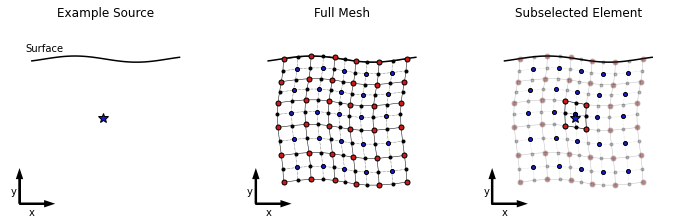

In [3]:


# Polynoimal degree and corresponding GLL points
npol = 2
ngll = npol + 1

# Number of elements
ne = 5

# GLL points
xi, _, _ = gll_nodes(npol)

# Element length
el = 1/ne

# Ibool coordinate storage
ibool = zeros((ne, ngll), int)
xg = zeros(npol*ne+1)

# Loop over elements to define the xglob coordinates
k = 0
for i in range(0, ne):
    ibool[i, 0] = k
    for j in range(1, ngll):
        k += 1
        ibool[i, j] = k
        xg[k] = i*el + .5*(xi[j]+1)*el


xx, yy = meshgrid(xg, xg)

# x = linspace(0,1,nel*(ngll-1)+1)
# y = linspace(0,1,nel*(ngll-1)+1)

# xx, yy = meshgrid(x,y)

pert = 0.025

def pertmesh(x,y,pert, scalex=1.0, scaley=1.0):
    return x + pert*(sin(2*pi*x/scalex) + cos(2*pi*y/scaley)), y + \
        pert*(sin(2*pi*x/scalex) - cos(2*pi*y/scaley))


xxp, yyp = pertmesh(xx,yy,pert)

# Remove vertain elements
xxpn = xxp[4:7,4:7]
yypn = yyp[4:7,4:7]


# Source location
xs = [0.475]
ys = [0.5]


def axlims():
    axis('equal')
    axis('off')
    xlim(-0.3, 1.3)
    ylim(-0.3, 1.3)
    
def plot_axis():
    
    lw = 1.0
    plot([0.0, -0.2, -0.2, -0.2], [-0.2, -0.2, -0.2, 0.0],
         'k-', lw=lw*2)#, solid_joinstyle='miter')
    arrow(-0.2, -0.2, 0.2, 0.0, width=0.02, lw=lw,
          edgecolor='none', facecolor='k')
    arrow(-0.2, -0.2, 0.0, 0.2, width=0.02, lw=lw,
          edgecolor='none', facecolor='k')
    annotate('x', xy=(-0.1, -0.225), ha='center', va='top')
    annotate('y', xy=(-0.225, -0.1), ha='right',
             va='center')

def plot_surface(label=False):
    
    x = linspace(-0.1, 1.1, 100)
    plot(x, pertmesh(x, 1.0, pert)[1], 'k', lw=1.5)
    if label:
        annotate('Surface', xy=(0.0, pertmesh(0.0, 1.0, pert)[1]+0.05), ha='center', va='bottom')
    
def plot_mesh(xxp, yyp, alpha=1.0, ngll=3, midpoints=True):
    
    lw = 0.5
    controlsize = 5
    midsize = 4
    gllsize = 3
    
    dgll = ngll-1
    
    for _k, (i, j) in enumerate(zip(xxp, yyp)):
    
        if _k % dgll == 0:
            plot(i, j, 'k', lw=lw, alpha=alpha)
        else:
            plot(i, j, 'k:', lw=lw, alpha=alpha)


    for _k, (i, j) in enumerate(zip(xxp.T, yyp.T)):
        if _k % dgll == 0:
            plot(i, j, 'k', lw=lw, alpha=alpha)
        else:
            plot(i, j, 'k:', lw=lw, alpha=alpha)

    # Overall GLL points
    plot(xxp, yyp, 'ko', markersize=gllsize, alpha=alpha)
    
    # Control points
    plot(xxp[::dgll, ::dgll], yyp[::dgll, ::dgll], 'o',
        markersize=controlsize, markerfacecolor=(0.8, 0.1, 0.1),
        markeredgecolor='k', alpha=alpha)
    
    # Center points
    if midpoints:
        alpha=1.0
    
    plot(xxp[1::dgll, 1::dgll], yyp[1::dgll, 1::dgll], 'o',
        markersize=midsize, markerfacecolor=(0.1, 0.1, 0.8),
        markeredgecolor='k', alpha=alpha)
    


fig = figure(figsize=(12,3.5))

subplot(1,3,1)
axlims()
plot_axis()
title("Example Source")
plot_surface(True)
plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1, 0.1, 0.8),
     markeredgecolor='k')


subplot(1,3,2)
axlims()
plot_axis()
plot_surface()
plot_mesh(xxp,yyp, ngll=ngll)
axis('off')
title("Full Mesh")

subplot(1,3,3)
axlims()
plot_axis()
plot_surface()
plot_mesh(xxp, yyp, alpha=0.25, ngll=ngll)
plot_mesh(xxpn, yypn, ngll=ngll)
plot(xs, ys, '*', markersize=10,markerfacecolor=(0.1,0.1,0.8),
     markeredgecolor='k')
title("Subselected Element")
axis('off')


plt.savefig('single-element-selection.pdf', dpi=300)



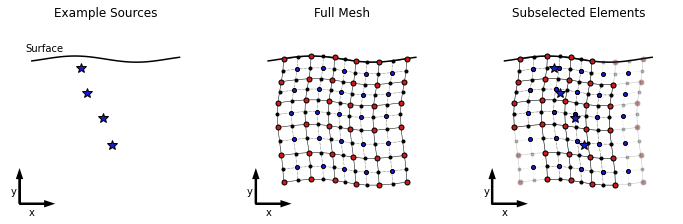

In [4]:
        
xxp, yyp = pertmesh(xx,yy,pert)

# Remove vertain elements
xxpn = xxp.copy()
yypn = yyp.copy()


# Source location
xs = [0.3, 0.35, 0.475, 0.55]
ys = [0.9, 0.7, 0.5, 0.275]

# Nan locations for the selected grid
# Bottom left
xxpn[:4,:2] = np.nan
yypn[:4,:2] = np.nan

# # topright
xxpn[:, -2:] = np.nan
yypn[:, -2:] = np.nan

# # topright left
xxpn[-2:, -4:] = np.nan
yypn[-2:, -4:] = np.nan

# # bottom right
xxpn[:2, -2:] = np.nan
yypn[:2, -2:] = np.nan

fig = figure(figsize=(12,3.5))

subplot(1,3,1)
axlims()
plot_axis()
title("Example Sources")
plot_surface(True)
plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1, 0.1, 0.8),
     markeredgecolor='k')


subplot(1,3,2)
axlims()
plot_axis()
plot_surface()
plot_mesh(xxp,yyp, ngll=ngll)
axis('off')
title("Full Mesh")

subplot(1,3,3)
axlims()
plot_axis()
plot_surface()
plot_mesh(xxp, yyp, alpha=0.25, ngll=ngll)
plot_mesh(xxpn, yypn, ngll=ngll)
plot(xs, ys, '*', markersize=10,markerfacecolor=(0.1,0.1,0.8),
     markeredgecolor='k')
title("Subselected Elements")
axis('off')


plt.savefig('element-selection.pdf', dpi=300)


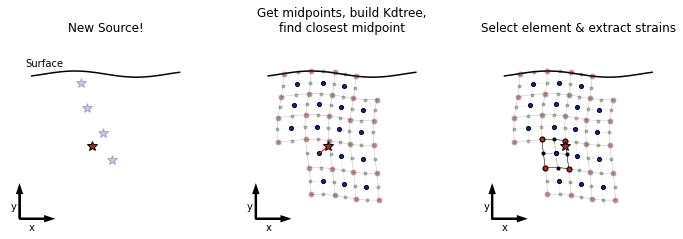

In [5]:
fig = figure(figsize=(12, 3.5))

subplot(1, 3, 1)
axlims()
plot_axis()
title("New Source!")
plot_surface(True)
xsn= 0.39
ysn = 0.39
plot(xsn, ysn, '*', markersize=10, markerfacecolor=(0.8, 0.1, 0.1),
     markeredgecolor='k')
plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1, 0.1, 0.8),
     markeredgecolor='k', alpha=0.25)

xxps = xxp[2:5, 2:5]
yyps = yyp[2:5, 2:5]

xgll, ygll = xxp[3,3], yyp[3,3]

subplot(1, 3, 2)
axlims()
plot_axis()
plot_surface()
# plot_mesh(xxp, yyp, alpha=0.25)
plot_mesh(xxpn, yypn, alpha=0.25, midpoints=True)
plot([xsn, xgll], [ysn, ygll], 'r', lw=1)
plot(xsn, ysn, '*', markersize=10, markerfacecolor=(0.8, 0.1, 0.1),
     markeredgecolor='k')
axis('off')
title("Get midpoints, build Kdtree,\nfind closest midpoint")


subplot(1, 3, 3)
axlims()
plot_axis()
plot_surface()
plot_mesh(xxpn, yypn, alpha=0.25)
plot_mesh(xxps, yyps)
plot(xsn, ysn, '*', markersize=10, markerfacecolor=(0.8, 0.1, 0.1),
     markeredgecolor='k')
axis('off')
title("Select element & extract strains")

# subplot(1, 3, 3)
# axlims()
# plot_axis()
# plot_surface()
# plot_mesh(xxp, yyp, alpha=0.25)
# plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1, 0.1, 0.8),
#      markeredgecolor='k')
# title("Subselected Elements")
# axis('off')

plt.savefig('single-seismogram.pdf', dpi=300)


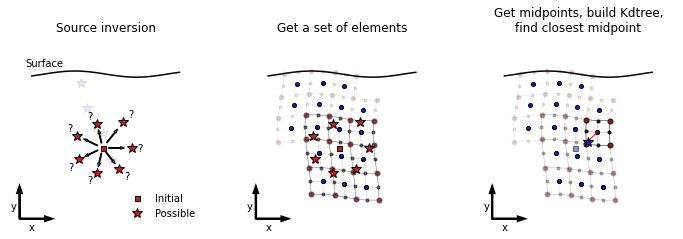

In [6]:
fig = figure(figsize=(12, 3.5))

Ns = 7
random.seed(1)
R = 0.2
r = R + 0.1*random.rand(Ns)
theta = arange(0, 2*pi,2*pi/Ns)
dx = r*cos(theta)
dy = r*sin(theta)

subplot(1, 3, 1)
axlims()
plot_axis()
title("Source inversion")
plot_surface(True)
xsn = 0.475
ysn = 0.375

plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1, 0.1, 0.8),
     markeredgecolor='k', alpha=0.1)
plot(xsn, ysn, 's', markersize=5, markerfacecolor=(0.8, 0.1, 0.1),
     markeredgecolor='k', label='Initial')
plot(xsn+dx, ysn+dy, '*', markersize=10, markerfacecolor=(0.8, 0.1, 0.1),
     markeredgecolor='k', label="Possible")
for i in range(Ns):
    annotate("?", xy=(xsn+dx[i]+R*0.3*np.sign(dx[i]), ysn+dy[i]+R*0.3*np.sign(dy[i])), va='center', ha='center')
    arrow(xsn+dx[i]*0.2, ysn + dy[i]*0.2, dx[i]*0.4, dy[i]*0.4, width=0.0075)
legend(frameon=False, loc='lower right')

xxps = xxp[0:7, 2:9]
yyps = yyp[0:7, 2:9]

subplot(1, 3, 2)
axlims()
plot_axis()
plot_surface()
plot_mesh(xxpn, yypn, alpha=0.1)
plot_mesh(xxps, yyps,alpha=0.5)
plot(xsn, ysn, 's', markersize=5, markerfacecolor=(0.8, 0.1, 0.1),
     markeredgecolor='k', label='Initial')
plot(xsn+dx, ysn+dy, '*', markersize=10, markerfacecolor=(0.8, 0.1, 0.1),
     markeredgecolor='k', label="Possible")
axis('off')
title("Get a set of elements")

subplot(1, 3, 3)
axlims()
plot_axis()
plot_surface()
# plot_mesh(xxp, yyp, alpha=0.25)
plot_mesh(xxpn, yypn, alpha=0.1, midpoints=True)
plot_mesh(xxps, yyps, alpha=0.2)
plot_mesh(xxps[-3:, -3:], yyps[-3:, -3:], alpha=0.75)
plot([xsn+0.1, xxps[-2, -2]], [ysn+0.05, yyps[-2, -2]], 'r', lw=1)
plot(xsn, ysn, 's', markersize=5, markerfacecolor=(0.1, 0.1, 0.8),
     markeredgecolor='k', alpha=0.5)
plot(xsn+0.1, ysn+0.05, '*', markersize=10, markerfacecolor=(0.1, 0.1, 0.8),
     markeredgecolor='k')
axis('off')
title("Get midpoints, build Kdtree,\nfind closest midpoint")



plt.savefig('source-inversion.pdf', dpi=300)


In [7]:
from lwsspy.GF.lagrange import gll_nodes

# Polynoimal degree and corresponding GLL points
npol = 3
ngll = npol + 1

# Number of elements
ne = 1

# GLL points
xi, _, _ = gll_nodes(npol)

# Element length
el = 1/ne

# Ibool coordinate storage
ibool = zeros((ne, ngll), int)
xg = zeros(npol*ne+1)

# Loop over elements to define the xglob coordinates
k = 0
for i in range(0, ne):
    ibool[i, 0] = k
    for j in range(1, ngll):
        k += 1
        ibool[i, j] = k
        xg[k] = i*el + .5*(xi[j]+1)*el


xx, yy = meshgrid(xg, xg)


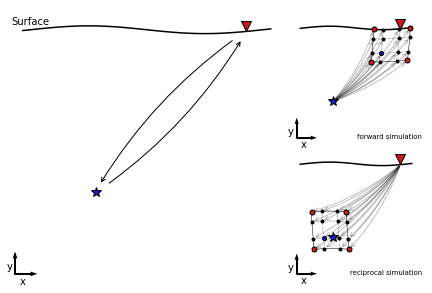

In [8]:
pert=0.05
xxpr,yypr= pertmesh(xx+2,yy+2,pert, scalex=3.0, scaley=3.0)
xxps, yyps = pertmesh(xx+0.25, yy+0.5, pert, scalex=3.0, scaley=3.0)


xr,yr = pertmesh(2.75, 3.0, pert, scalex=3.0, scaley=3.0)
xs,ys = pertmesh(0.8, 0.8, pert, scalex=3.0, scaley=3.0)

def axlims2(big=False, equal=True):
    if equal:
        axis('equal')
    axis('off')
    
    if big:
        xlim(-0.3, 3.3)
        ylim(-0.3, 3.3)
    else:
        xlim(-0.5, 3.5)
        ylim(-0.5, 3.75)


def plot_axis(big=False):

    lw = 1.0
    
    if big:
        plot([0.0, -0.2, -0.2, -0.2], [-0.2, -0.2, -0.2, 0.0],
         'k-', lw=lw*2)  # , solid_joinstyle='miter')
        arrow(-0.2, -0.2, 0.2, 0.0, width=0.02, lw=lw,
            edgecolor='none', facecolor='k')
        arrow(-0.2, -0.2, 0.0, 0.2, width=0.02, lw=lw,
            edgecolor='none', facecolor='k')
        
        annotate('x', xy=(-0.1, -0.225), ha='center', va='top')
        annotate('y', xy=(-0.225, -0.1), ha='right',
             va='center')
    
    else:
        plot([0.2, -0.2, -0.2, -0.2], [-0.2, -0.2, -0.2, 0.2],
             'k-', lw=lw*2)  # , solid_joinstyle='miter')
        arrow(-0.2, -0.2, 0.4, 0.0, width=0.04, lw=lw,
            edgecolor='none', facecolor='k')
        arrow(-0.2, -0.2, 0.0, 0.4, width=0.04, lw=lw,
            edgecolor='none', facecolor='k')
        annotate('x', xy=(0.0, -0.225), ha='center', va='top')
        annotate('y', xy=(-0.3, 0.0), ha='right',
             va='center')
    

def plot_surface2(label=False):

    x = linspace(-0.1, 3.1, 100)
    plot(x, pertmesh(x, 3.0, pert, scalex=3.0, scaley=3.0)[1], 'k', lw=1.5)
    if label:
        annotate('Surface', xy=(0.0, pertmesh(0.0, 3.0, pert, scalex=3.0, scaley=3.0)
                 [1]+0.05), ha='center', va='bottom')


gs = GridSpec(2,2,width_ratios=[2,1], wspace=0, hspace=0)
fig = plt.figure(figsize=(7.5,5))

fig.add_subplot(gs[:,0])
plot_axis(True)
axlims2(True)
plot_surface2(True)
plot(xr, yr + 0.07, 'v', markersize=10, markerfacecolor=(0.8,0.1,0.1), markeredgecolor='k')
plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1,0.1,0.8), markeredgecolor='k')

annotate("",
         xy=(xr-0.05, yr-0.1), xycoords='data',
         xytext=(xs+0.15, ys+0.1), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.1"),
            )

annotate("",
            xy=(xs+0.05, ys+0.1), xycoords='data',
            xytext=(xr-0.15, yr-0.1), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.1"),
            )


fig.add_subplot(gs[0,1])
plot_axis()
axlims2()
plot_surface2()

for _x, _y in zip(xxpr.flatten(), yypr.flatten()):
    annotate("",
            xy=(_x, _y), xycoords='data',
            xytext=(xs, ys), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3,rad=0.1",
                                alpha=0.25))

plot_mesh(xxpr,yypr, ngll=ngll)
plot(xr, yr + 0.15, 'v', markersize=10, markerfacecolor=(0.8,0.1,0.1), markeredgecolor='k')
plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1,0.1,0.8), markeredgecolor='k')
plot_label(gca(), "forward simulation",
           fontsize='x-small', location=4, box=False,)

fig.add_subplot(gs[1,1])
plot_axis()
axlims2()
plot_surface2()

for _x, _y in zip(xxps.flatten(), yyps.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xr, yr), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=-0.1",
                             alpha=0.25))

plot_mesh(xxps,yyps, ngll=ngll)
plot(xr, yr + 0.15, 'v', markersize=10, markerfacecolor=(0.8,0.1,0.1), markeredgecolor='k')
plot(xs, ys, '*', markersize=10, markerfacecolor=(0.1,0.1,0.8), markeredgecolor='k')
plot_label(gca(), "reciprocal simulation", fontsize='x-small', location=4, box=False,)
savefig('reciprocity.pdf')

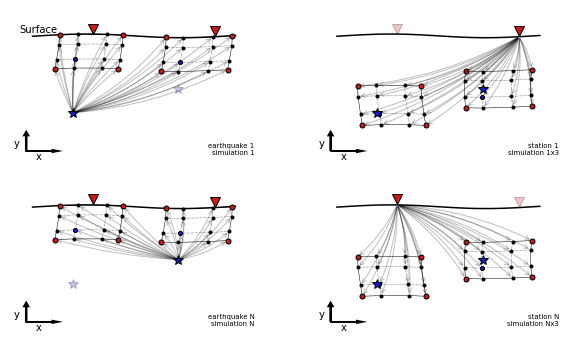

In [9]:
fig = plt.figure(figsize=(10,6))
gs = GridSpec(2,2,width_ratios=[1,1], wspace=0.2, hspace=0.1)

# Add new elements
xxpr2,yypr2= pertmesh(xx+0.25,yy+2,pert, scalex=3.0, scaley=3.0)
xxps2, yyps2 = pertmesh(xx+2.0, yy+1.0, pert, scalex=3.0, scaley=3.0)

# Add stations and sources
xr,yr = pertmesh(2.75, 3.0, pert, scalex=3.0, scaley=3.0)
xr2,yr2 = pertmesh(0.75, 3.0, pert, scalex=3.0, scaley=3.0)
xs,ys = pertmesh(0.5, 0.8, pert, scalex=3.0, scaley=3.0)
xs2,ys2 = pertmesh(2.3, 1.5, pert, scalex=3.0, scaley=3.0)


fig.add_subplot(gs[0,0])
plot_axis()
axlims2(equal=False)
plot_surface2(True)

for _x, _y in zip(xxpr.flatten(), yypr.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xs, ys), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=0.1",
                             alpha=0.25))
    
for _x, _y in zip(xxpr2.flatten(), yypr2.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xs, ys), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=-0.05",
                             alpha=0.25))

plot_mesh(xxpr, yypr, ngll=ngll)
plot_mesh(xxpr2, yypr2, ngll=ngll)
plot(xr, yr + 0.15, 'v', markersize=10,
     markerfacecolor=(0.8, 0.1, 0.1), markeredgecolor='k')
plot(xr2, yr2 + 0.15, 'v', markersize=10,
     markerfacecolor=(0.8, 0.1, 0.1), markeredgecolor='k')
plot(xs, ys, '*', markersize=10,
     markerfacecolor=(0.1, 0.1, 0.8), markeredgecolor='k')
plot(xs2, ys2, '*', markersize=10,
     markerfacecolor=(0.1, 0.1, 0.8), markeredgecolor='k', alpha=0.25)
plot_label(gca(), "earthquake 1\nsimulation 1",
           fontsize='x-small', location=4, box=False,)


fig.add_subplot(gs[1,0])
plot_axis()
axlims2(equal=False)
plot_surface2()


for _x, _y in zip(xxpr.flatten(), yypr.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xs2, ys2), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=0.1",
                             alpha=0.25))

for _x, _y in zip(xxpr2.flatten(), yypr2.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xs2, ys2), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=-0.05",
                             alpha=0.25))

plot_mesh(xxpr, yypr, ngll=ngll)
plot_mesh(xxpr2, yypr2, ngll=ngll)
plot(xr, yr + 0.15, 'v', markersize=10,
     markerfacecolor=(0.8, 0.1, 0.1), markeredgecolor='k')
plot(xr2, yr2 + 0.15, 'v', markersize=10,
     markerfacecolor=(0.8, 0.1, 0.1), markeredgecolor='k')
plot(xs, ys, '*', markersize=10,
     markerfacecolor=(0.1, 0.1, 0.8), markeredgecolor='k', alpha=0.25)
plot(xs2, ys2, '*', markersize=10,
     markerfacecolor=(0.1, 0.1, 0.8), markeredgecolor='k')
plot_label(gca(), "earthquake N\nsimulation N",
           fontsize='x-small', location=4, box=False,)


fig.add_subplot(gs[0, 1])
plot_axis()
axlims2(equal=False)
plot_surface2()


for _x, _y in zip(xxps.flatten(), yyps.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xr, yr), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=-0.1",
                             alpha=0.25))

for _x, _y in zip(xxps2.flatten(), yyps2.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xr, yr), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=-0.1",
                             alpha=0.25))

plot_mesh(xxps, yyps, ngll=ngll)
plot_mesh(xxps2, yyps2, ngll=ngll)
plot(xr, yr + 0.15, 'v', markersize=10,
     markerfacecolor=(0.8, 0.1, 0.1), markeredgecolor='k')
plot(xr2, yr2 + 0.15, 'v', markersize=10,
     markerfacecolor=(0.8, 0.1, 0.1), markeredgecolor='k', alpha=0.25)
plot(xs, ys, '*', markersize=10,
     markerfacecolor=(0.1, 0.1, 0.8), markeredgecolor='k')
plot(xs2, ys2, '*', markersize=10,
     markerfacecolor=(0.1, 0.1, 0.8), markeredgecolor='k')
plot_label(gca(), "station 1\nsimulation 1x3",
           fontsize='x-small', location=4, box=False)


fig.add_subplot(gs[1, 1])
plot_axis()
axlims2(equal=False)
plot_surface2()

for _x, _y in zip(xxps.flatten(), yyps.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xr2, yr2), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=-0.1",
                             alpha=0.25))

for _x, _y in zip(xxps2.flatten(), yyps2.flatten()):
    annotate("",
             xy=(_x, _y), xycoords='data',
             xytext=(xr2, yr2), textcoords='data',
             arrowprops=dict(arrowstyle="->",
                             connectionstyle="arc3,rad=-0.1",
                             alpha=0.25))
    
plot_mesh(xxps, yyps, ngll=ngll)
plot_mesh(xxps2, yyps2, ngll=ngll)
plot(xr, yr + 0.15, 'v', markersize=10,
     markerfacecolor=(0.8, 0.1, 0.1), markeredgecolor='k', alpha=.25)
plot(xr2, yr2 + 0.15, 'v', markersize=10,
     markerfacecolor=(0.8, 0.1, 0.1), markeredgecolor='k')
plot(xs, ys, '*', markersize=10,
     markerfacecolor=(0.1, 0.1, 0.8), markeredgecolor='k')
plot(xs2, ys2, '*', markersize=10,
     markerfacecolor=(0.1, 0.1, 0.8), markeredgecolor='k')
plot_label(gca(), "station N\nsimulation Nx3",
           fontsize='x-small', location=4, box=False)

savefig('reciprocity2.pdf')


In [10]:
stations   = 200
components = 3
strain     = 6
samples    = 14400 # 1 sps
chunks     = 6
elements_per_chunk = 256**2
gll_points = 125
storage_per_sample = 4 # single precision


byte2gb = 1/1024**3
byte2tb = 1/1024**4
byte2pb = 1/1024**5
bytes = stations * components * strain * samples * chunks * elements_per_chunk *gll_points * storage_per_sample
print("GB", bytes*byte2gb)
print("TB", bytes*byte2tb)
print("PB", bytes*byte2pb)

GB 9492187.5
TB 9269.71435546875
PB 9.052455425262451
